In [41]:
from ZebraLib.zebralib import zebraperformance as zp
from ZebraLib.zebralib.zebraperformance import *
from ZebraLib.zebralib.zebra_wing import Wing
import numpy as np
import matplotlib.pyplot as plt

In [101]:
Area_wet = 10

Zb1 = Airplane(name='Versão 1.0', b=1.8, S=0.719, Af=0.638, c=0.395, CLmax= 1.6112, Load=5.5, mv=2.8, CLn=1.140, Swet= Area_wet, Tc=(-0.001, -0.225, 35.225))
Zb2 = Airplane(name='Versão 2.0', b=1.8, S=0.684, Af=0.556, c=0.392, CLmax= 1.613, Load=5.5, mv=2.8, CLn=1.111, Swet= Area_wet, Tc=(-0.001, -0.225, 35.225))
Zb3 = Airplane(name='Versão 3.0', b=1.86, S=0.843, Af=0.601, c=0.463, CLmax= 1.5193, Load=5.5, mv=2.8, CLn=1.080, Swet= Area_wet, Tc=(-0.001, -0.225, 35.225))

Zbs = [Zb1, Zb2, Zb3]

In [102]:
Zb1

Nome= Versão 1.0, 
W=82.404,Load=5.500, 
Af=0.638, S=0.719, b=1.800, 
C_D0=0.136, Clmáx=1.611, 
c=0.395, AR=4.506, 
CLmax_Alc=1.234, CLmax_Aut=2.137, 
Swet=10.000, 
Vstall=11.432, Vlo=12.575, 
WS=114.609, TW=0.161, 
Eficmax=4.550

In [103]:
Zb2

Nome= Versão 2.0, 
W=82.404,Load=5.500, 
Af=0.556, S=0.684, b=1.800, 
C_D0=0.143, Clmáx=1.613, 
c=0.392, AR=4.737, 
CLmax_Alc=1.298, CLmax_Aut=2.249, 
Swet=10.000, 
Vstall=11.714, Vlo=12.885, 
WS=120.474, TW=0.169, 
Eficmax=4.554

In [100]:
Zb3

Nome= Versão 3.0, 
W=82.404,Load=5.500, 
Af=0.601, S=0.843, b=1.860, 
C_D0=0.058, Clmáx=1.519, 
c=0.463, AR=4.104, 
CLmax_Alc=0.771, CLmax_Aut=1.336, 
Swet=5.000, 
Vstall=10.872, Vlo=11.959, 
WS=97.751, TW=0.146, 
Eficmax=6.669

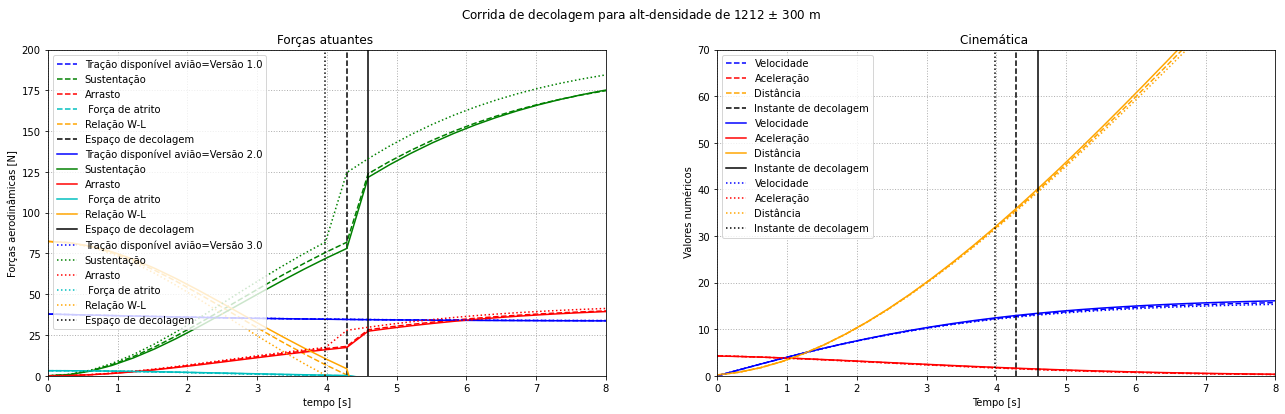

In [85]:
Markers = ['--', '-', 'dotted']

#PLOTAGEM
fig, ax = plt.subplots(figsize=(22, 6),nrows=1, ncols=2)
fig.suptitle(r'Corrida de decolagem para alt-densidade de 1212 $\pm$ 300 m ')

#CONSTRUINDO O 1 SUBGRÁFICO   
ax[0].set(title= 'Forças atuantes ', xlabel='tempo [s]',ylabel='Forças aerodinâmicas [N]')
#CONSTRUINDO O 2 SUBGRÁFICO
ax[1].set(title= 'Cinemática ',xlabel='Tempo [s]', ylabel=' Valores numéricos')


for avião, marks in zip(Zbs, Markers):
    #Metodos para dinamica de de colagem
    Vlo_index, _V, T, L, D, Fat = avião.takeOff_Forces()
    # Métodos para cinemática de decolagem
    t, d, V, a = avião.takeOff_Kinematic_EDO()

    #Plotando os dados para o avião Zb1
    ax[0].plot(t, T, linestyle=marks, color='b', label = f'Tração disponível avião={avião.name}')
    ax[0].plot(t, L, linestyle=marks, color= 'g',label = 'Sustentação')
    ax[0].plot(t, D, linestyle=marks, color='r',label = 'Arrasto')
    ax[0].plot(t, Fat, linestyle=marks, color='c', label = ' Força de atrito ')
    ax[0].plot(t, Fat/avião.mi, linestyle=marks, color='orange' , label = 'Relação W-L ') #Gambiarra para poupar trabalho "Fat/Zb.mi"

    ax[0].plot([t[Vlo_index]]*2, [0,250], linestyle=marks, color='black' , label = f'Espaço de decolagem')
    ax[0].set_ylim(0, 200)
    ax[0].set_xlim(0, 8)
    ax[0].legend()
    ax[0].grid(linestyle='dotted', linewidth=1)

    #Plotando os dados para o avião Zb1
    ax[1].plot(t, V, linestyle=marks, color='b', label = f'Velocidade')
    ax[1].plot(t, a, linestyle=marks, color='r', label = 'Aceleração')
    ax[1].plot(t, d, linestyle=marks, color='orange', label = 'Distância')

    ax[1].plot([t[Vlo_index]]*2, [0, 100], linestyle=marks, color='black' , label = f'Instante de decolagem')

    ax[1].set_ylim(0, 70)
    ax[1].set_xlim(0, 8)
    ax[1].legend()
    ax[1].grid(linestyle='dotted', linewidth=1)

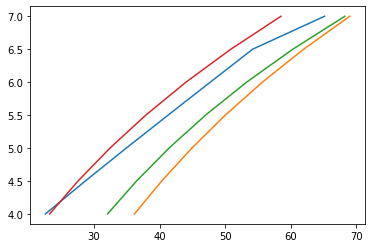

In [86]:
Pesos = np.linspace(4, 7, 7)

S = np.empty_like(Pesos)
Saprox = np.empty_like(Pesos)
Saprox2 = np.empty_like(Pesos)
Saprox3 = np.empty_like(Pesos)
for i, w in enumerate(Pesos):
    Zb1.Load = w
    Zb1.params_Calc
    S[i] = Zb1.takeOff_Distance_EDO(rho=1.08865)
    Saprox[i] = Zb1.takeOff_Distance_Anderson(rho=1.08865)
    Saprox2[i] = Zb1.takeOff_Distance_AproxAnderson(rho=1.08865)
    Saprox3[i] = Zb1.takeOff_Distance_AproxMiranda(rho=1.08865)
    
plt.plot(S, Pesos)
plt.plot(Saprox, Pesos)
plt.plot(Saprox2, Pesos)
plt.plot(Saprox3, Pesos)

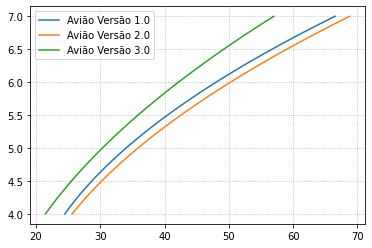

In [96]:
Pesos = np.linspace(4, 7, 50)
S = np.empty_like(Pesos)
Saprox = np.empty_like(Pesos)
Saprox2 = np.empty_like(Pesos)
Saprox3 = np.empty_like(Pesos)

fig, ax = plt.subplots()
ax.set(title='Distância de decolagem', xlabel='Distância de decolagem (m)', ylabel='Carga paga (Kg)')

for avião in Zbs:
    S = np.empty_like(Pesos)
    for i, w in enumerate(Pesos):
        avião.Load = w
        avião.params_Calc
        S[i] = avião.takeOff_Distance_EDO(rho=1.08865)
    Sc = fit(Pesos, S, 2)
    ax.plot(Sc(Pesos), Pesos, label=f'Avião {avião.name}')

plt.vlines(50, 4, 7, linestyles = '--')    
ax.legend()
ax.grid(linestyle='dotted')
plt.show()

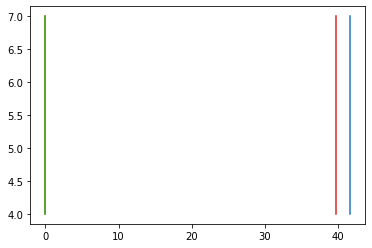

In [90]:
Pesos = np.linspace(4, 7, 7)

S = np.empty_like(Pesos)
Saprox = np.empty_like(Pesos)
Saprox2 = np.empty_like(Pesos)
Saprox3 = np.empty_like(Pesos)

for i, w in enumerate(Pesos):
    Zb1.Load = w
    Zb1.params_Calc
    S[i] = Zb2.takeOff_Distance_EDO(rho=1.08865)
    Saprox3[i] = Zb2.takeOff_Distance_AproxMiranda(rho=1.08865)
    
plt.plot(S, Pesos)
plt.plot(Saprox, Pesos)
plt.plot(Saprox2, Pesos)
plt.plot(Saprox3, Pesos)